In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
import scipy.stats as stat
import pylab 


In [29]:
#import datasets 
train_dist = pd.read_csv("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/train_set_with_only_distance_feat.csv").drop(["Unnamed: 0"], axis = 1)
test_dist = pd.read_csv("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/test_set_with_only_distance_feat.csv").drop(["Unnamed: 0"], axis = 1)
test_df = pd.read_csv("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/dataset_test_without_rev_features.csv").drop(["Unnamed: 0"], axis = 1)
rev = pd.read_csv("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/revenue_labels.csv").drop(["Unnamed: 0"], axis = 1)
stores_train_impuded = pd.read_csv("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/stores_gk_impuded.csv")
stores_test_impuded = pd.read_csv("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/stores_test_impuded.csv")
income_district = pd.read_csv("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/income_district.csv").drop(["Unnamed: 0"], axis = 1)
income_municipality = pd.read_csv("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/income_municipality.csv").drop(["Unnamed: 0"], axis = 1)
distance_train = pd.read_csv("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/arash_train.csv").drop(["Unnamed: 0"], axis = 1)
distance_test = pd.read_csv("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/arash_test.csv").drop(["Unnamed: 0"], axis = 1)
rev_precion = pd.read_csv("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/notebooks/Arash/submit_files/new_transformation.csv")
radius = pd.read_csv("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/train_set_with_only_distance_feat.csv").drop(["Unnamed: 0"], axis = 1)
radius_test = pd.read_csv("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/test_set_with_only_distance_feat.csv").drop(["Unnamed: 0"], axis = 1)
simens_df = pd.read_csv("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/simen_train.csv").drop(["Unnamed: 0"], axis = 1)
simens_test = pd.read_csv("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/simen_test.csv").drop(["Unnamed: 0"], axis = 1)
pop_store_geo = pd.read_csv("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/notebooks/shared/pop_store_geo.csv")
pop_store_geo_test = pd.read_csv("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/notebooks/shared/pop_store_geo_test.csv")

busstops = pd.read_csv('C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/raw/busstops_norway.csv')
grunnkrets_age = pd.read_csv('C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/raw/grunnkrets_age_distribution.csv')
grunnkrets_household = pd.read_csv('C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/raw/grunnkrets_households_num_persons.csv')
grunnkrets_income = pd.read_csv('C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/raw/grunnkrets_income_households.csv')
grunnkrets_norway = pd.read_csv('C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/raw/grunnkrets_norway_stripped.csv')
plaace_hierarchy = pd.read_csv('C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/raw/plaace_hierarchy.csv')
sample_submission = pd.read_csv('C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/raw/sample_submission.csv')
stores_extra = pd.read_csv('C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/raw/stores_extra.csv')
stores_test = pd.read_csv('C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/raw/stores_test.csv')
stores_train = pd.read_csv('C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/raw/stores_train.csv')


In [30]:
new_rev = rev[(rev.revenue > 0)]


In [31]:
new_rev["rev_log"] = np.log(new_rev.revenue)

<ipython-input-31-6100232f0542>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rev["rev_log"] = np.log(new_rev.revenue)


In [33]:
pt = PowerTransformer( method = "box-cox")
test = pt.fit_transform(new_rev[["revenue"]])
new_rev["rev_box"] = test 

<ipython-input-33-e70be144baf1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rev["rev_box"] = test


In [34]:
pt2 = PowerTransformer()
test2 = pt2.fit_transform(new_rev[["revenue"]])
new_rev["rev_yeo"] = test

<ipython-input-34-a29954b13deb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rev["rev_yeo"] = test


In [37]:
test3 = pt2.fit_transform(rev[["revenue"]])
rev["zero_not_removed_rev_trans"] = test3

In [49]:
rev_rev = rev[(rev.zero_not_removed_rev_trans > -1.88)]

In [50]:
rev_rev2 = rev[(rev.zero_not_removed_rev_trans < -1.88)]

In [51]:
rev_rev2

,revenue,zero_not_removed_rev_trans
23,0.000,-1.892687
29,0.000,-1.892687
38,0.000,-1.892687
82,0.000,-1.892687
97,0.000,-1.892687
...,...,...
12764,0.000,-1.892687
12773,0.000,-1.892687
12827,0.000,-1.892687
12836,0.000,-1.892687


In [26]:
new_rev["z_score"] = (new_rev.rev_yeo - new_rev.rev_yeo.mean()) / new_rev.rev_yeo.std() 
new_rev2 = new_rev[(new_rev.z_score > -3.7)]
new_rev3 = new_rev[(new_rev.z_score > -3.7) & (new_rev.z_score < 3.7)]



<ipython-input-26-a3ba2786476b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rev["z_score"] = (new_rev.rev_yeo - new_rev.rev_yeo.mean()) / new_rev.rev_yeo.std()


In [47]:
rev_rev

,revenue,zero_not_removed_rev_trans
0,17.998,1.297656
1,23.828,1.479391
2,16.099,1.222406
3,9.296,0.827877
4,4.528,0.262912
...,...,...
12854,0.088,-1.761009
12855,1.816,-0.469207
12856,38.225,1.760669
12857,3.642,0.086109


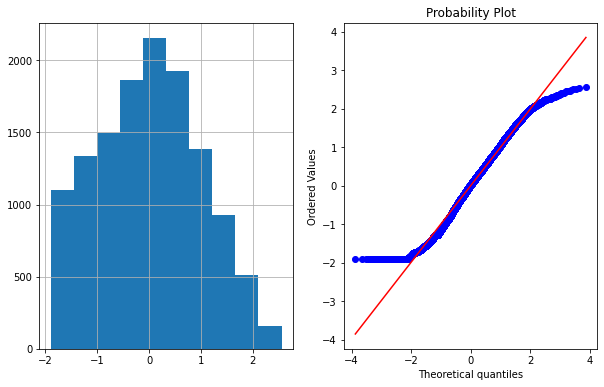

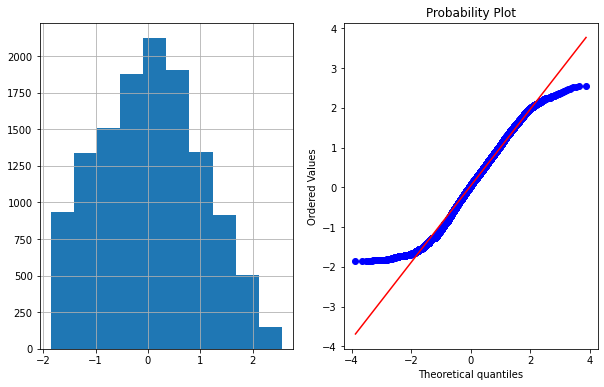

In [48]:
plot_data(rev, "zero_not_removed_rev_trans")
plot_data(rev_rev, "zero_not_removed_rev_trans")

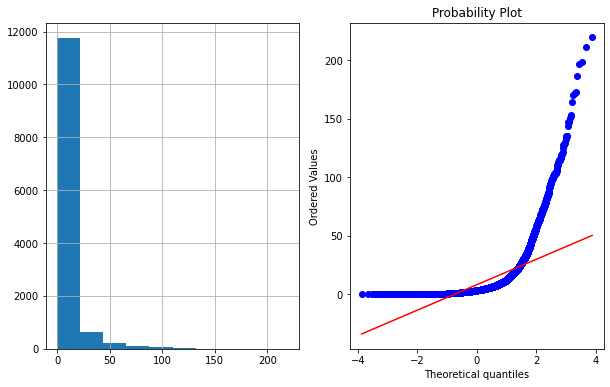

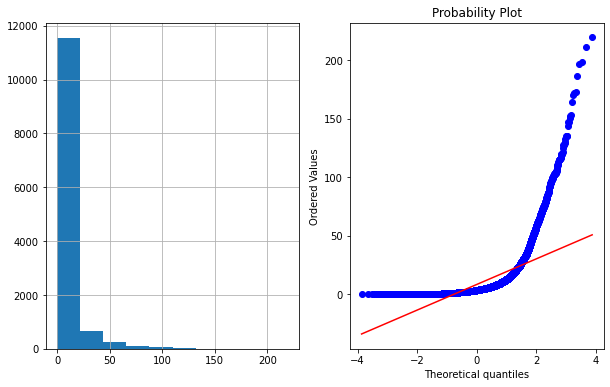

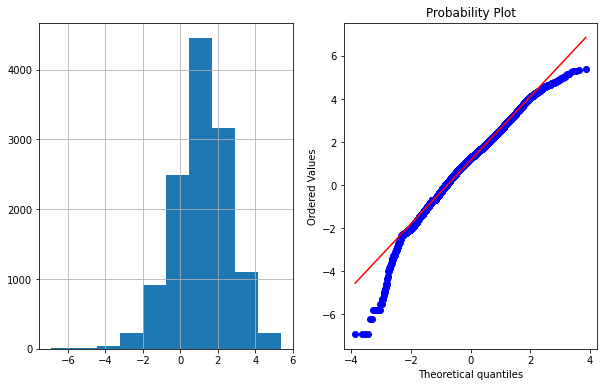

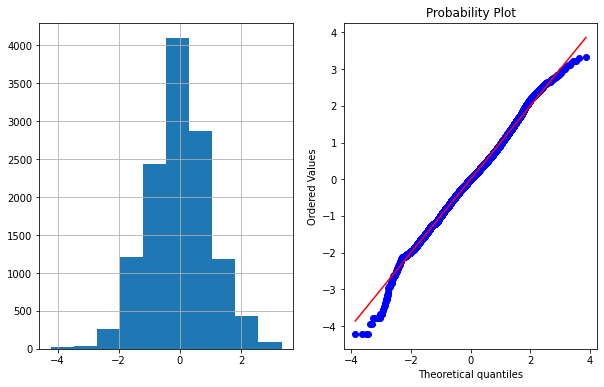

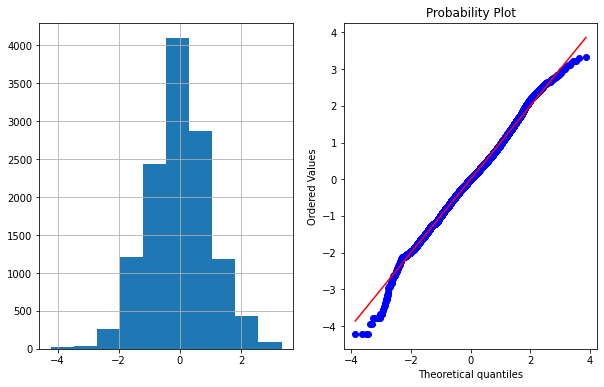

In [33]:
plot_data(rev, "revenue")
plot_data(new_rev, "revenue")
plot_data(new_rev, "rev_log")
plot_data(new_rev, "rev_box")
plot_data(new_rev, "rev_yeo")

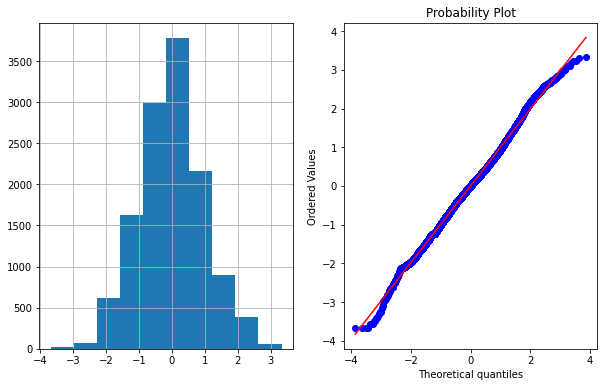

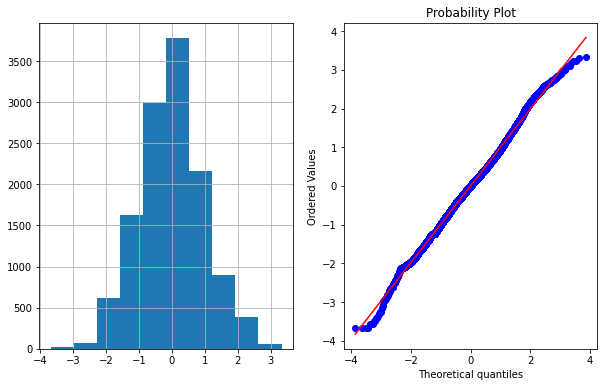

In [40]:
plot_data(new_rev3, "rev_box")
plot_data(new_rev2, "rev_box")


### Simple impuder

In [3]:
# simple impuder with mean 

class PandasSimpleImputer(SimpleImputer):
    """A wrapper around `SimpleImputer` to return data frames with columns.
    """

    def fit(self, X, y=None):
        self.columns = X.columns
        return super().fit(X, y)

    def transform(self, X):
        return pd.DataFrame(super().transform(X), columns=self.columns)


### Power Transformation 


In [15]:
def powertransformer_yeo(df_original, df_impuded): 
    for col in df_impuded: 
        temp = PowerTransformer().fit_transform(df_impuded[[col]])
        df_original[col] = temp
    return df_original

In [16]:
def powertransformer_boxcox(df_original, df_impuded): 
    for col in df_impuded: 
        temp = PowerTransformer(method="box-cox").fit_transform(df_impuded[[col]])
        df_original[col] = temp
    return df_original

### Robust Scaler

In [7]:
scaler_robust = RobustScaler()
def robust_scaler(df_original, df_impuded):
    for col in df_impuded:
        df_robust_scaler = scaler_robust.fit_transform(df_impuded[[col]])
        df_original[col] = df_robust_scaler
    return df_original

### Simple concat function

In [8]:
def concat_function(stores_df, adding_df): 
    for col in adding_df: 
        stores_df[col] = adding_df[col]
    return stores_df 

### Two different ploting functions
- First one is a Q-Q-plot which show how close to a normal distrubution the transformation results
- The second show the distrubution before and after transformation

In [14]:
#Check wether or not a feature is guassian or normal distributed, using Q-Q plot 

def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
    
def plots(df, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' + str(t).split('(')[0])
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after ' + str(t).split('(')[0])


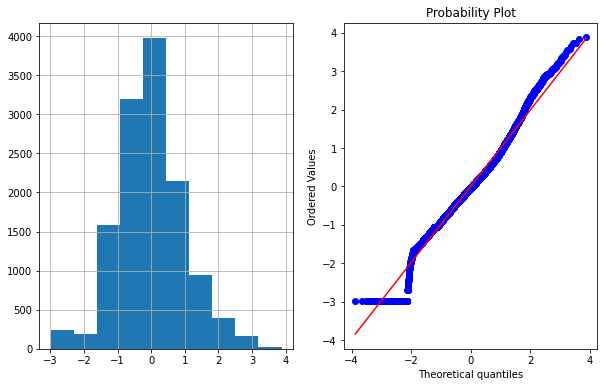

In [83]:
distance_train.iloc[:, 17:23]

,distance_to_mangler_viktighetsnivå,distance_to_standard_holdeplass,distance_to_lokalt_knutepunkt,distance_to_nasjonalt_knutepunkt,distance_to_regionalt_knutepunkt,distance_to_annen_viktig_holdeplass
0,0.005315,0.012600,0.005467,0.294614,0.016952,0.155313
1,0.001579,0.045599,0.001257,0.020375,0.001559,0.116319
2,0.000371,0.011161,0.025783,0.326362,0.017330,0.054763
3,0.005329,0.010858,0.016854,0.012352,0.000522,5.257526
4,0.003096,0.002093,0.003370,0.319223,0.644539,0.006737
...,...,...,...,...,...,...
12854,0.001349,0.008576,0.006203,0.176835,0.005978,0.009062
12855,0.002951,0.118968,0.022918,0.333546,0.051408,0.168095
12856,0.001587,0.102015,0.025107,0.249433,0.032679,0.037453
12857,0.001097,0.005468,0.080072,0.116255,0.144443,0.101411


### Transforming the respective columns

In [99]:

distance_train["bus_distance_to_store"] = distance_train.iloc[:, 17:23].min(axis = 1)
distance_train["stores_in_radius"] = radius[["storesinradiustransformer__in_radius"]]
distance_train.drop(distance_train.iloc[:, 17:23], inplace=True, axis = 1)

In [100]:

distance_test["bus_distance_to_store"] = distance_test.iloc[:, 16:22].min(axis = 1)
distance_test["stores_in_radius"] = radius_test[["storesinradiustransformer__in_radius"]]
distance_test.drop(distance_test.iloc[:, 16:22], inplace=True, axis = 1)

In [101]:
distance_train["revenue"] = rev.revenue

In [102]:
new_stores = distance_train.merge(pop_store_geo, how = "left", on = "store_id")
new_stores_test = distance_test.merge(pop_store_geo_test, how = "left", on = "store_id")

In [103]:
new_stores_test.iloc[:, 25:]

,grunnkrets_id_lv1_desc_pop_per_num_store,grunnkrets_id_lv2_desc_pop_per_num_store,grunnkrets_id_lv3_desc_pop_per_num_store,grunnkrets_id_lv4_desc_pop_per_num_store,district_name_lv1_desc_pop_per_num_store,district_name_lv2_desc_pop_per_num_store,district_name_lv3_desc_pop_per_num_store,district_name_lv4_desc_pop_per_num_store,municipality_name_lv1_desc_pop_per_num_store,municipality_name_lv2_desc_pop_per_num_store,municipality_name_lv3_desc_pop_per_num_store,municipality_name_lv4_desc_pop_per_num_store
0,970.000000,970.000000,970.0,970.0,1167.200000,1167.200000,5836.0,5836.0,1770.122340,2429.072993,95080.857143,95080.857143
1,NaN,NaN,NaN,NaN,3334.000000,3334.000000,6668.0,6668.0,4403.083333,6604.625000,52837.000000,52837.000000
2,2421.000000,2421.000000,2421.0,2421.0,16336.500000,16336.500000,32673.0,32673.0,1770.122340,2429.072993,95080.857143,95080.857143
3,149.000000,149.000000,149.0,149.0,1800.400000,1800.400000,9002.0,9002.0,2170.279070,2522.216216,93322.000000,93322.000000
4,1230.250000,1640.333333,4921.0,4921.0,1714.000000,1958.857143,13712.0,13712.0,1770.122340,2429.072993,95080.857143,95080.857143
...,...,...,...,...,...,...,...,...,...,...,...,...
8572,428.000000,428.000000,428.0,428.0,1203.166667,2406.333333,7219.0,7219.0,1347.064516,5219.875000,41759.000000,41759.000000
8573,254.750000,1019.000000,1019.0,1019.0,1464.333333,3514.400000,17572.0,17572.0,1318.350000,7755.000000,131835.000000,131835.000000
8574,257.400000,429.000000,1287.0,1287.0,1267.000000,2111.666667,6335.0,6335.0,2257.400000,3762.333333,11287.000000,11287.000000
8575,304.666667,914.000000,914.0,914.0,1793.000000,5379.000000,5379.0,5379.0,1714.375000,13715.000000,27430.000000,27430.000000


In [96]:

income_features = new_stores.iloc[:, 11:17]
income_features["stores_in_radius"] = new_stores_test[["stores_in_radius"]]
other_features = new_stores.iloc[:, 17:25]
pop_features = new_stores.iloc[:, 26:]
#area_train = stores_train_impuded[["area_km2"]]

In [104]:

income_test_features = new_stores_test.iloc[:, 10:16]
income_test_features["stores_in_radius"] = new_stores_test[["stores_in_radius"]]
other_test_features = new_stores_test.iloc[:, 16:24]
pop_test_features = new_stores_test.iloc[:, 25:]
#area_test = stores_test_impuded[["area_km2"]]


In [105]:
income_impuded = PandasSimpleImputer().fit_transform(income_features)
other_impuded = PandasSimpleImputer().fit_transform(other_features)
pop_impuded = PandasSimpleImputer().fit_transform(pop_features)
income_transformed = powertransformer_yeo(distance_train, income_impuded)
other_transformed = powertransformer_boxcox(income_transformed, other_impuded)
all_transformed = powertransformer_boxcox(other_transformed, pop_impuded)




In [107]:
income_test_impuded = PandasSimpleImputer().fit_transform(income_test_features)
other_test_impuded = PandasSimpleImputer().fit_transform(other_test_features)
pop_test_impuded = PandasSimpleImputer().fit_transform(pop_test_features)
income_test_transformed = powertransformer_yeo(distance_test, income_test_impuded)
other_test_transformed = powertransformer_boxcox(income_test_transformed, other_test_impuded)
all_test_transformed = powertransformer_boxcox(other_test_transformed, pop_test_impuded)


In [113]:
plaace_df = plaace_hierarchy.drop(["sales_channel_name", "lv1_desc", "lv2_desc", "lv3_desc", "lv4_desc"], axis = 1)
plaace_df[["lv1", "lv2", "lv3", "lv4"]] = plaace_df[["lv1", "lv2", "lv3", "lv4"]].astype(str)
plaace_df["lv2"] = plaace_df["lv2"].apply(lambda x: x.replace(".","_"))
plaace_df["lv3"] = plaace_df["lv3"].apply(lambda x: x.replace(".","_"))
plaace_df["lv4"] = plaace_df["lv4"].apply(lambda x: x.replace(".","_"))

train = all_transformed.merge(plaace_df, how = "left", on = "plaace_hierarchy_id")
train[["lastname", "firstname", "high_income", "low_income", "high_density", "low_density"]] = simens_df[["lastname", "firstname", "high_income", "low_income", "high_density", "low_density"]]
new_train = train.drop(["plaace_hierarchy_id"], axis = 1).set_index("store_id")

test = all_test_transformed.merge(plaace_df, how = "left", on = "plaace_hierarchy_id")
test[["lastname", "firstname", "high_income", "low_income", "high_density", "low_density"]] = simens_test[["lastname", "firstname", "high_income", "low_income", "high_density", "low_density"]]
new_test = test.drop(["plaace_hierarchy_id"], axis = 1).set_index("store_id")


new_train



,distance_to_lv4_desc,grunnkrets_id_density,t_district_density,municipality_name_density,bus_distance_to_store,stores_in_radius,grunnkrets_id_lv1_desc_pop_per_num_store,grunnkrets_id_lv2_desc_pop_per_num_store,grunnkrets_id_lv3_desc_pop_per_num_store,grunnkrets_id_lv4_desc_pop_per_num_store,...,lv1,lv2,lv3,lv4,lastname,firstname,high_income,low_income,high_density,low_density
store_id,,,,,,,,,,,,,,,,,,,,,
983540538-974187930-44774,0.772654,-0.425471,0.606571,0.833192,1.172723,2.073982,-2.280257,-2.559921,-1.095156,-1.161922,...,1,1_1,1_1_1,1_1_1_0,MAGASINET,MCDONALD'S,0,0,1,0
987074191-973117734-44755,-0.555738,0.562198,1.670229,1.587416,-0.266239,0.077304,0.467451,0.364139,0.330711,0.334432,...,1,1_1,1_1_1,1_1_1_0,KLINGENBERGGATA,MCDONALD'S,0,1,1,0
984890265-981157303-64491,1.784193,0.220562,0.286544,-0.853802,-1.701040,0.638089,-0.603475,-1.218768,-0.256206,-0.292774,...,1,1_1,1_1_1,1_1_1_0,HØNEFOSS,BURGER,0,1,0,1
914057442-992924179-126912,0.735018,0.856468,0.783587,0.178579,-1.275865,0.601223,-1.347597,-1.552872,0.007751,-0.022926,...,1,1_1,1_1_1,1_1_1_0,GLASSHUSPASSASJEN,BURGER,0,0,1,0
913018583-913063538-668469,-0.404034,0.562198,-0.195110,0.572502,0.272254,2.061942,0.467451,0.364139,0.330711,0.334432,...,1,1_1,1_1_1,1_1_1_0,TILLERTORGET,BURGER,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915789943-915806929-781991,0.105307,0.892994,0.267269,0.032579,-0.189354,0.449203,-0.680420,0.334898,1.476346,1.452024,...,2,2_8,2_8_11,2_8_11_2,BRYGGERIUTSALG,MEIERIGÅRDEN,0,0,1,0
917921733-917982368-868081,1.615662,0.595046,0.793294,-0.824242,0.616217,0.449203,-1.135343,0.329910,0.074488,0.045050,...,2,2_8,2_8_11,2_8_11_2,GJØVIK,GULATING,0,1,0,1
911721961-911764474-496764,0.881749,1.383700,0.735564,0.470185,-0.015789,0.449203,-1.326383,-0.891292,1.055604,1.033674,...,2,2_8,2_8_11,2_8_11_2,STRØMMEN,GULATING,1,0,1,0


In [34]:
new_train.to_csv("pop_income_distance.csv")
new_test.to_csv("pop_income_distance_test.csv")

### z-score detecting outliers 

In [142]:
def detect_outliers (stores_df, target, threshold_value): 
    outliers = []
    threshold = threshold_value
    mean = np.mean(stores_df[target])
    std = np.std(stores_df[target])

    for i in stores_df[target]: 
        z_score = (i - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return pd.DataFrame({"rev_outliers": outliers})
    

In [143]:
check_df = stores_train[["store_id", "revenue"]]
check_df["z_score"] = (check_df.revenue - check_df.revenue.mean()) / check_df.revenue.std()
outliers = check_df[(check_df.z_score < -3) | (check_df.z_score > 3)]


<ipython-input-143-095067af16d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_df["z_score"] = (check_df.revenue - check_df.revenue.mean()) / check_df.revenue.std()


In [144]:
outliers

,store_id,revenue,z_score
53,999276032-985152012-278955,70.000,4.017610
381,997097246-997551923-163877,60.844,3.422181
398,991949283-993310190-115693,81.609,4.772563
603,999183751-999206204-306176,57.709,3.218306
716,991642684-991810811-325907,61.373,3.456582
...,...,...,...
9074,979400934-979458169-10711,57.056,3.175841
9102,912757102-973152440-11049,63.935,3.623193
11625,911959240-911974061-622234,62.778,3.547952
11627,975807371-975825639-390482,98.935,5.899301


In [145]:
new_stores_train["z_score"] = (new_stores_train.revenue - new_stores_train.revenue.mean()) / new_stores_train.revenue.std()
stores_train_no_outliers = (new_stores_train[(new_stores_train.z_score >-3) & (new_stores_train.z_score < 3)])



In [148]:
train_without_outliers = stores_train_no_outliers.drop(["z_score"], axis = 1).set_index("store_id")
train_without_outliers.to_csv("train_without_outliers.csv")

In [147]:
train_without_outliers

,store_name,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,lat,lon,chain_name,mall_name,revenue,...,pt_box_distance_to_lv2_desc,pt_box_distance_to_lv3_desc,pt_box_distance_to_lv4_desc,pt_box_grunnkrets_id_density,pt_box_t_district_density,pt_box_municipality_name_density,lv1,lv2,lv3,lv4
store_id,,,,,,,,,,,,,,,,,,,,,
983540538-974187930-44774,MCDONALD'S BRAGERNES TORG MAGASINET,1.1.1.0,Hamburger restaurants,6020303,BRAGERNES TORG 13,59.743104,10.204928,MCDONALDS,Magasinet Drammen,17.998,...,-0.536963,0.815145,0.772654,-0.425471,0.606571,0.833192,1,1,1,0
987074191-973117734-44755,MCDONALD'S KLINGENBERGGATA,1.1.1.0,Hamburger restaurants,3010306,NaN,59.913759,10.734031,MCDONALDS,NaN,23.828,...,-0.768995,-0.515914,-0.555738,0.562198,1.670229,1.587416,1,1,1,0
984890265-981157303-64491,BURGER KING HØNEFOSS,1.1.1.0,Hamburger restaurants,6050102,KONG RINGS GATE 1,60.164751,10.254656,BURGER KING,Kuben Hønefoss,16.099,...,-0.435900,1.831593,1.784193,0.220562,0.286544,-0.853802,1,1,1,0
914057442-992924179-126912,BURGER KING GLASSHUSPASSASJEN,1.1.1.0,Hamburger restaurants,18040102,STORGATA 12,67.283669,14.379796,BURGER KING,Glasshuspassasjen,9.296,...,-0.736431,0.777371,0.735018,0.856468,0.783587,0.178579,1,1,1,0
913018583-913063538-668469,BURGER KING TILLERTORGET,1.1.1.0,Hamburger restaurants,16017414,NaN,63.358068,10.374832,BURGER KING,Tillertorget,4.528,...,-0.300597,-0.364151,-0.404034,0.562198,-0.195110,0.572502,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915789943-915806929-781991,MEIERIGÅRDEN BRYGGERIUTSALG,2.8.11.2,Beer and soda shop,7010705,THUEGATA 2,59.416276,10.480970,NaN,NaN,0.088,...,-0.176127,-0.112144,0.105307,0.892994,0.267269,0.032579,2,8,11,2
917921733-917982368-868081,GULATING ØLUTSALG CC GJØVIK,2.8.11.2,Beer and soda shop,5020406,NaN,60.799991,10.693635,GULATING GRUPPEN,CC Gjøvik,1.816,...,-2.390752,-2.821749,1.615662,0.595046,0.793294,-0.824242,2,8,11,2
911721961-911764474-496764,GULATING ØLUTSALG STRØMMEN,2.8.11.2,Beer and soda shop,2310803,STØPERIVEIEN 6,59.946562,11.007659,GULATING GRUPPEN,Strømmen Storsenter,38.225,...,-0.576198,-0.936167,0.881749,1.383700,0.735564,0.470185,2,8,11,2


### Testing with plots

<AxesSubplot:xlabel='revenue', ylabel='Count'>

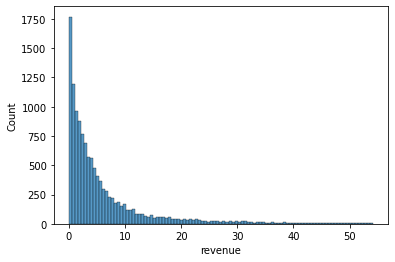

In [114]:
sns.histplot(data = train_without_outliers, x = "revenue")


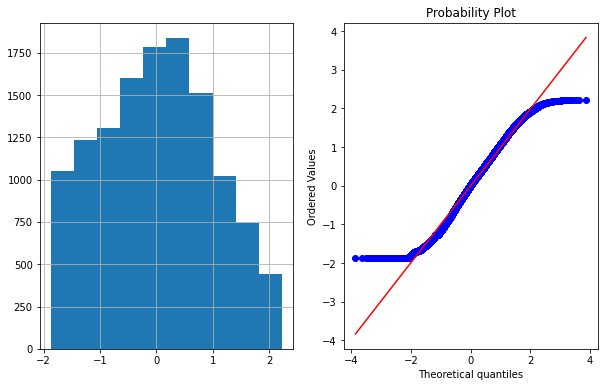

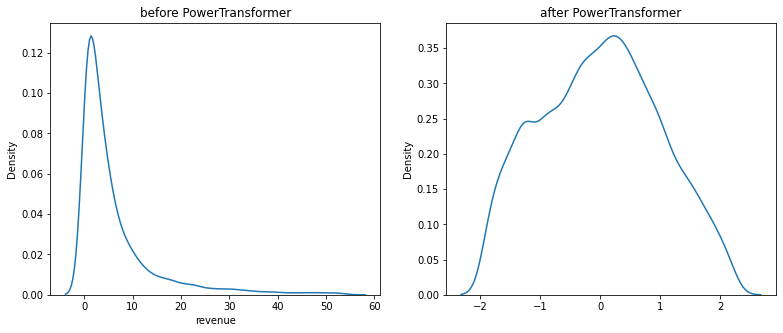

In [121]:
rev_trans = train_without_outliers[["revenue"]]
rev_transform_plot = powertransformer_yeo(train_without_outliers, rev_trans)
plot_data(rev_transform_plot, "pt_yeo_revenue")
plot_data()
plots(train_without_outliers, "revenue", PowerTransformer())


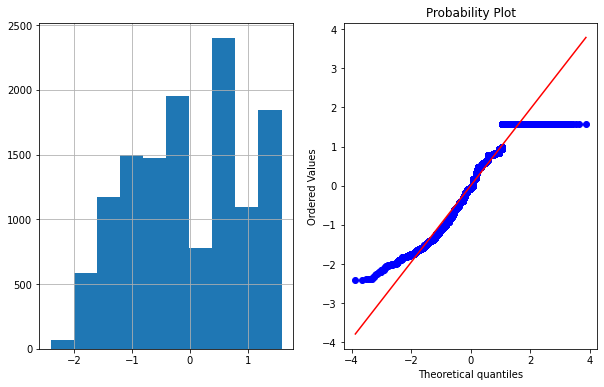

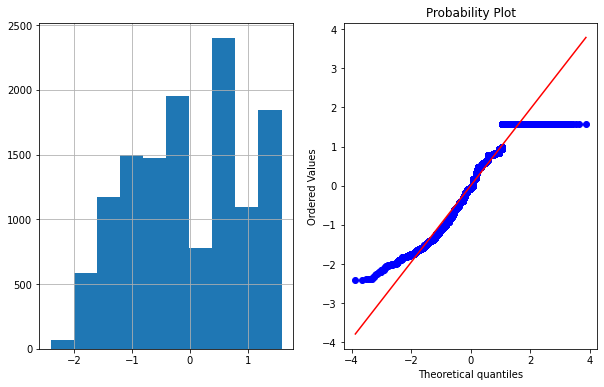

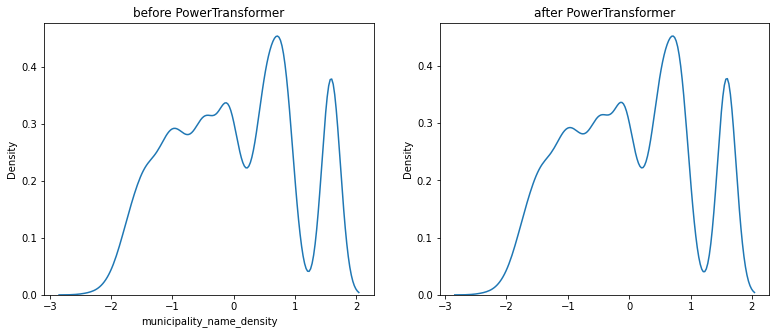

In [290]:
plot_data(distance_train, "municipality_name_density")
plot_data(new_stores_train, "municipality_name_density")
plots(distance_train, "municipality_name_density", PowerTransformer())

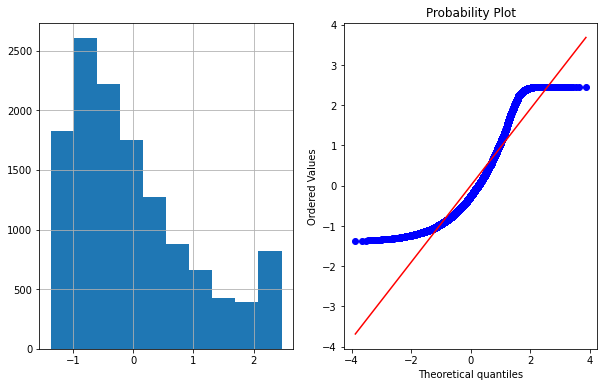

In [17]:
plot_data(features_transformed, "pt_yeo_distance_to_mangler_viktighetsnivå")

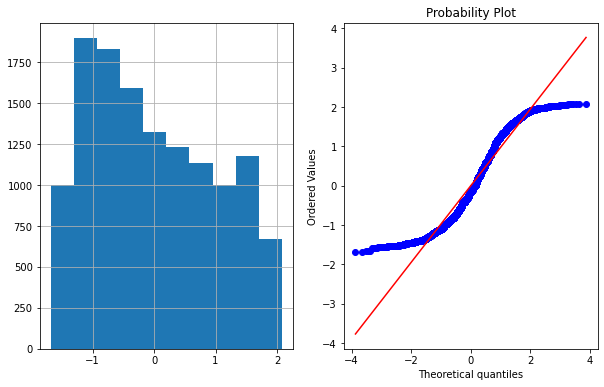

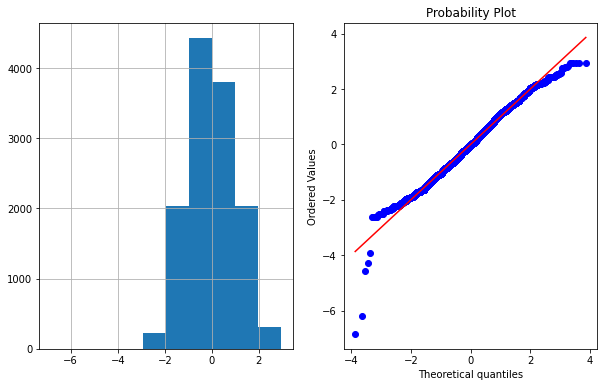

In [62]:
#plot_data(train_dist, "closeststore__distance_lv1_desc")
plot_data(stores_temp, "pt_yeo_area_km2")
plot_data(stores_temp, "pt_box_area_km2")


### Log Transform 

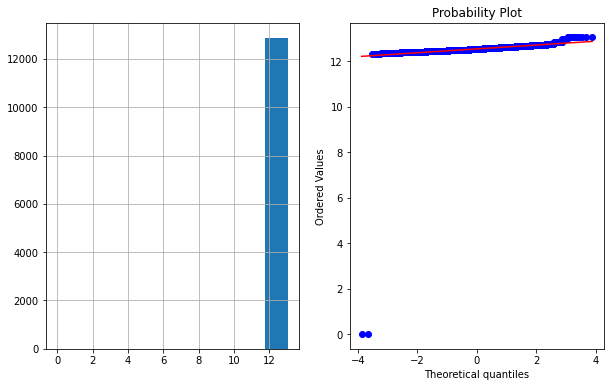

In [218]:
#Taking log(1+x)

#train_dist_transformed["cs_lv1_log"] = np.log(train_dist["closeststore__distance_lv1_desc"])
#plot_data(train_dist_transformed, "cs_lv1_log")

income_imp["singles_log"] = np.log(1+income_imp.singles)
plot_data(income_imp, "singles_log")

### Reciprocal Trnasformation

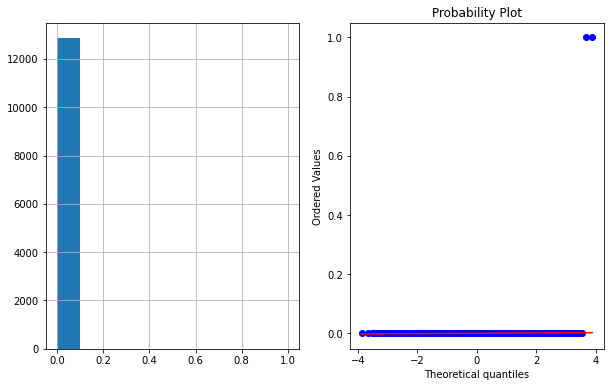

In [219]:
### Taking 1/(1+x)

#train_dist_transformed["cs_lv1_reciprocal"]= 1 / (train_dist["closeststore__distance_lv1_desc"])
#plot_data(train_dist_transformed, "cs_lv1_reciprocal")

income_imp["singles_reciprocal"] = 1 / (1+income_imp.singles)
plot_data(income_imp, "singles_reciprocal")

### Square root transformation 

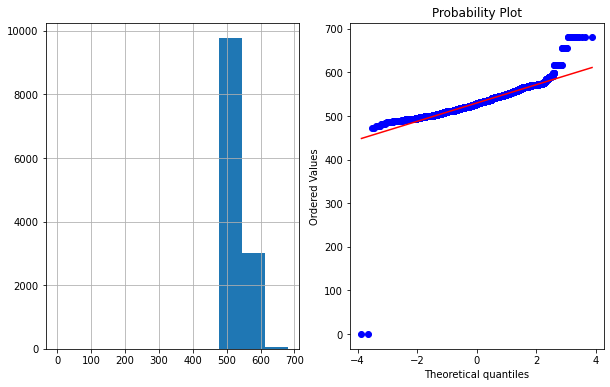

In [221]:
#train_dist_transformed["cs_lv1_squared"] = train_dist["closeststore__distance_lv1_desc"]**(1/2)
#plot_data(train_dist_transformed, "cs_lv1_squared")

income_imp["singles_squared"] = income_imp["singles"]**(1/2)
plot_data(income_imp, "singles_squared")

### Exponential Transdormation

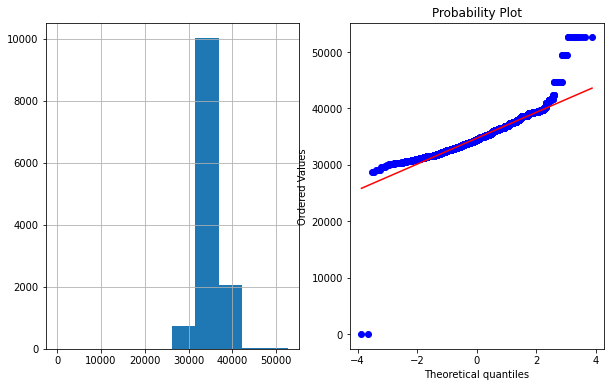

In [222]:
#train_dist_transformed["cs_lv1_exp"] = train_dist["closeststore__distance_lv1_desc"]**(1/1.2)
#plot_data(train_dist_transformed,"cs_lv1_exp")

income_imp["singles_exp"] = income_imp["singles"]**(1/1.2)
plot_data(income_imp, "singles_exp")

### BoxCOx Transformation
The Box-Cox transformation is defined as:

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

In [223]:
#train_dist_transformed["cs_lv1_boxcox"], parameters = stat.boxcox(train_dist["closeststore__distance_lv1_desc"])
#plot_data(train_dist_transformed, "cs_lv1_boxcox")

income_imp["singles_boxcox"], parameters = stat.boxcox(income_imp["singles"])
plot_data(income_imp, "singles_boxcox")



ValueError: Data must be positive.

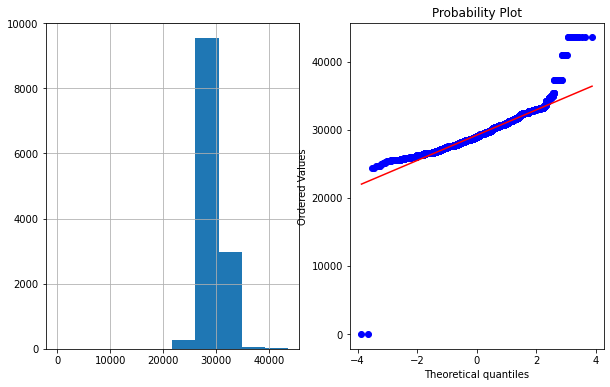

In [224]:
#train_dist_transformed["cs_lv1_yeojohnson"], parameters = stat.yeojohnson(train_dist["closeststore__distance_lv1_desc"])
#plot_data(train_dist_transformed, "cs_lv1_yeojohnson")

income_imp["singles_yeo"], parameters = stat.yeojohnson(income_imp["singles"])
plot_data(income_imp, "singles_yeo")  

In [ ]:
#plots(train_dist, "closeststore__distance_lv1_desc", PowerTransformer())
plots(income_imp, "singles", PowerTransformer())
plots(income_imp, "all_households", PowerTransformer())

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize=(12, 3), ncols=2)
income_imp.all_households.plot.hist(bins=100, ax=ax1)
ax1.set_title('Distribution of Revenues');
income_imp.all_house_yeo.plot.hist(bins=100, ax = ax2)
ax2.set_title("Transformed")